# Логистическая регрессия
Линейный классификатор - применение линейной регрессии для задач классификации. Линия в многомерном случае - плоскость, которая разделяет между собой объекты разных классов.

Главное отличие в том, что линейная модель выдает выходы на всей числовой прямой (от - до + бесконечности). При решении задач логистической регрессии мы получаем метки или вероятности классов. Для этого надо преобразовать выход модели в отрезок от 0 до 1 (вероятности).

Длля этого применяется функция **сигмоиды**, изображенная на графике. Она преобразуют всю числовую прямую в отрезок (0, 1). В центре около нуля склон довольно резкий, то есть небольшие отступы в сторону дают достаточный отступ по вероятности от 0,5, что достаточно удобно для классификации.

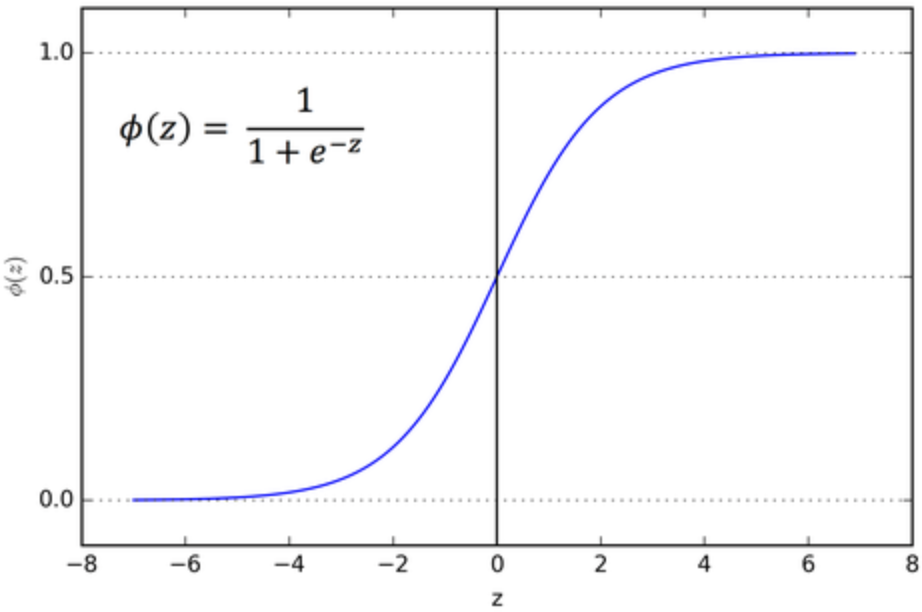

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Датасет - классификация заболеваний сердца. Есть данные людей и отметка о наличии у них заболеваний сердца (целевая функция).   

In [2]:
data = pd.read_csv('/Users/user/Library/Mobile Documents/com~apple~CloudDocs/Documents/HSE/1 семестр/Анализ данных и машинное обучение/Data/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Предобработка данных 
Надо преобразовать категориальные признаки через кодирование. По умолчанию метод pandas возвращает количество столбцов, равное количеству категорий. Например, для пола он вернет два столбца для каждого пола. 

Удаляем лишние столбцы через **drop_first** - выкидывает один столбец, так как в одном уже содержится вся нужная информация. 

In [55]:
data_encoded = pd.get_dummies(data, drop_first = True).astype(float)
data_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


Если у человека есть заболевания сердца, отметка об этом находится в столбце HeartDisease. 

In [5]:
X = data_encoded.drop(columns=["HeartDisease"])
y = data_encoded["HeartDisease"]

Делим выборку на обучающую и тестовую.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((826, 15), (92, 15), (826,), (92,))

Удобно объдинить несколько моделей и обработчиков из sklearn в **пайплайн**, чтобы они выполнялись последовательно, и не надо было это делать вручную.


Используем **StandardScaler**, чтобы данные выглядели нормально. Берем побольше итераций. 

In [9]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 10000))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=10000))])

Две вероятности, которые в сумме дают 1.

In [10]:
pipe.predict_proba(X_test)

array([[0.87011567, 0.12988433],
       [0.87587129, 0.12412871],
       [0.04307281, 0.95692719],
       [0.71705295, 0.28294705],
       [0.79934019, 0.20065981],
       [0.64326664, 0.35673336],
       [0.98186776, 0.01813224],
       [0.08266239, 0.91733761],
       [0.33297492, 0.66702508],
       [0.3570626 , 0.6429374 ],
       [0.01507148, 0.98492852],
       [0.01402364, 0.98597636],
       [0.93316637, 0.06683363],
       [0.06927373, 0.93072627],
       [0.93915213, 0.06084787],
       [0.94071714, 0.05928286],
       [0.06703262, 0.93296738],
       [0.23800379, 0.76199621],
       [0.48661634, 0.51338366],
       [0.59079658, 0.40920342],
       [0.75162288, 0.24837712],
       [0.02996394, 0.97003606],
       [0.0202934 , 0.9797066 ],
       [0.02623636, 0.97376364],
       [0.03446321, 0.96553679],
       [0.8507855 , 0.1492145 ],
       [0.73830974, 0.26169026],
       [0.27254009, 0.72745991],
       [0.00742716, 0.99257284],
       [0.98365379, 0.01634621],
       [0.

Высокие значения метрик.  

In [56]:
print(f"""
Accuracy = {accuracy_score(y_test, pipe.predict(X_test))}
F1 score = {f1_score(y_test, pipe.predict(X_test))}
ROC-AUC = {roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])}
""")


Accuracy = 0.8478260869565217
F1 score = 0.8703703703703703
ROC-AUC = 0.9240384615384616



# Реализация логистической регрессии

**LogLoss** - loss функция, которая применяется в логистической регрессии. Минимизируем функцию.
- для **положительных** классов - вычисляем логарифм вероятности
- для **отрицательных** классов - вычисляем логарифм от (1 - вероятность)

Вероятность - как раз сигмоида из модели. 

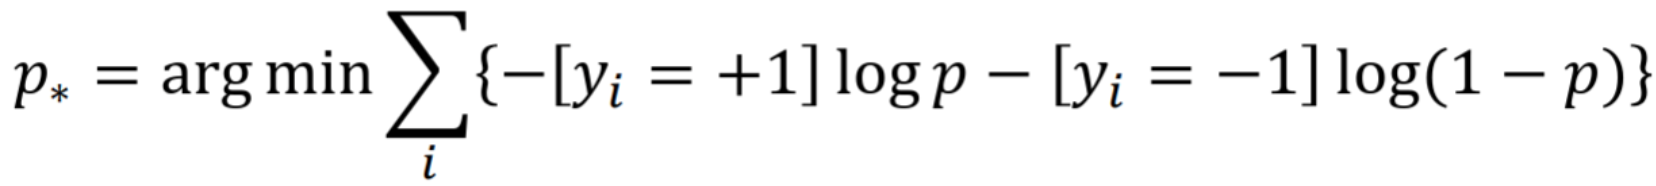

В случае, когда классы обозначены, как 1 и 0 (наш случай), можно записать:
- для **положительного** класса - у
- для **отриательного** класса - (1 - у)

In [ ]:
loss = -y * log(p) - (1 - y) * log(1 - p)
p = sigmoid(x)
z = x * w + b # z - линейная функция

### Дифференциирование
Дальше это надо продифференциировать, чтобы вычислить градиентный спуск. Удобнее дифференциировать по частям. 

Сначала берем производную от **loss** функции по предсказаниям. Произодная логарифма - 1 разделить на аргумент. Так как под логарифмом (1 - p) минус, то переносим этот минус за скобки и меняем - на + перед (1 - у). 

In [ ]:
loss' dp = -y / p + (1 - y) / (1 - p) 

Производная **сигмоиды** - сама сигмоида, умноженная на 1 минус эта же сигмоида.

In [ ]:
p' dz = p * (1- p)

Производная линейной функции по весам - х, по сдвигам - 1.

In [ ]:
z' dw = x
z' db = 1

Для получения производной loss по весам по правилам дифференциирования сложной функции, это все надо перемножить. Производная loss для байеса будет такой же, как по весам, только без х.

In [ ]:
loss' dw = (-y / p + (1 - y) / (1 - p)) * (p * (1- p)) * x
loss' dw = (-y * (1 - p) + (1 - y) * p) * x 
loss' dw = (-y + y * p + p - y * p) * x
loss' dw = (p - y) * x

loss' db = p - y

Алгоритм реализации логистической регрессии отличается от линейной только подсчетом градиентов и предсказаниями.

Для самой модели loss нам не особо нужен, так как мы уже посчитали градиент. Так как мы сразу передаем предсказания, то формула для loss будет такой же, и от нее берем среднее. 

**Предсказания** - линейная функция и примененная к ней сигмоида, выраженная в вероятности. 
 Сигмоида по формуле с графике наверху = 1 / (1 + exp(-z)). Ч

Из-за использования экспоненты могут вылезать предупреждения. 

In [12]:
import warnings
warnings.filterwarnings("ignore")

## Логистическая регрессия с регуляризацией 
Чтобы улучшить подход, можно добавить **регуляризацию**. Она есть в реализации sklearn, по дефолту установлена как l2, но можно включить и l1. 

In [57]:
class LogReg:
    def __init__(self, lr: float = 1e-2, num_steps: int = 1000, penalty: str = 'l1', C: float = 1.0) -> None:
        self.lr = lr
        self.num_steps = num_steps
        self.penalty = penalty # тип регуляризации
        self.C = C # гиперпараметр, на который делится регуляризация
        self.scaler = StandardScaler()

    def loss(self, y: np.ndarray, y_pred: np.ndarray) -> float:
        loss = (- y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean()
        if self.penalty == 'l2':
            reg = (1 / (2 * self.C)) * np.sum(self.w ** 2) # штраф (1 / 2C) * sum(w^2) для l2
            return loss + reg
        elif self.penalty == 'l1':
            reg = (1 / self.C) * np.sum(np.abs(self.w)) # штраф (1 / C) * sum(|w|) для l1
            return loss + reg
        return base_loss

    def grad_w(self, y: np.ndarray, y_pred: np.ndarray, x: np.ndarray) -> np.ndarray:
        grad = ((y_pred - y) @ x) / len(y) # матрично умножаем на х и делим на длину выборки, размерность такая же, как у весов
        if self.penalty == 'l2':  # добавляем L2 регуляризацию
            grad += (1 / self.C) * self.w
        elif self.penalty == 'l1':  # добавляем L1 регуляризацию
            grad += (1 / self.C) * np.sign(self.w)
        return grad

    def grad_b(self, y: np.ndarray, y_pred: np.ndarray) -> float:
        return (y_pred - y).mean()  # регуляризация не влияет на байес 

    def fit(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        self.scaler.fit(X_train)
        X_train = self.scaler.transform(X_train)
        self.w = np.random.randn(X_train.shape[1]) # инициализируем веса такого же размера, как кол-во признаков в данных
        self.b = 0

        for i in range(self.num_steps):  # градиентный спуск как цикл по итерациям 
            y_pred = self.predict_proba(X_train) # считаем вероятности относительно train
            self.w -= self.lr * self.grad_w(y_train, y_pred, X_train) # делаем шаг градиентного спуска 
            self.b -= self.lr * self.grad_b(y_train, y_pred)

    def predict_proba(self, X_test: np.ndarray) -> np.ndarray:
        X_test = self.scaler.transform(X_test)
        z = X_test @ self.w + self.b
        return 1 / (1 + np.exp(-z))  # возвращает сигмоиду от линейной функции

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        return (self.predict_proba(X_test) >= 0.5).astype(int) # если вероятность >0.5, возвращаем 1, если <0.5 возвращаем 0 

Чтобы не возникло проблем при передаче датафреймами, преобразуем датасеты в numpy. 

In [58]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

Берем побольше learning rate и итераций, чтобы были выше значения метрик. 

In [59]:
my_logreg = LogReg(lr = 1e-2, num_steps = 1000, penalty = 'l1', C = 1)
my_logreg.fit(X_train, y_train)

In [60]:
print(f"""
Accuracy = {accuracy_score(y_test, my_logreg.predict(X_test))}
F1 score = {f1_score(y_test, my_logreg.predict(X_test))}
ROC-AUC = {roc_auc_score(y_test, my_logreg.predict_proba(X_test))}
""")


Accuracy = 0.5652173913043478
F1 score = 0.7222222222222222
ROC-AUC = 0.5466346153846154



In [67]:
my_logreg = LogReg(lr = 1e-2, num_steps = 1000, penalty = 'l2', C = 1)
my_logreg.fit(X_train, y_train)

In [68]:
print(f"""
Accuracy = {accuracy_score(y_test, my_logreg.predict(X_test))}
F1 score = {f1_score(y_test, my_logreg.predict(X_test))}
ROC-AUC = {roc_auc_score(y_test, my_logreg.predict_proba(X_test))}
""")


Accuracy = 0.7934782608695652
F1 score = 0.8429752066115702
ROC-AUC = 0.9139423076923077



In [69]:
my_logreg = LogReg(lr = 1e-2, num_steps = 1000, penalty = None, C = 1)
my_logreg.fit(X_train, y_train)

In [70]:
print(f"""
Accuracy = {accuracy_score(y_test, my_logreg.predict(X_test))}
F1 score = {f1_score(y_test, my_logreg.predict(X_test))}
ROC-AUC = {roc_auc_score(y_test, my_logreg.predict_proba(X_test))}
""")


Accuracy = 0.7934782608695652
F1 score = 0.7956989247311828
ROC-AUC = 0.8961538461538461



**Вывод:** значения метрик при регуляризации l2 выше и ближе к значениям модели из sklearn, чем при регуляризации l1 или ее отсутствии.

In [75]:
my_logreg = LogReg(lr = 1e-2, num_steps = 1000, penalty = 'l2', C = 0.01)
my_logreg.fit(X_train, y_train)

In [76]:
print(f"""
Accuracy = {accuracy_score(y_test, my_logreg.predict(X_test))}
F1 score = {f1_score(y_test, my_logreg.predict(X_test))}
ROC-AUC = {roc_auc_score(y_test, my_logreg.predict_proba(X_test))}
""")


Accuracy = 0.5652173913043478
F1 score = 0.7222222222222222
ROC-AUC = 0.9177884615384616



При снижении **силы регуляризации** падает точность модели и уменьшается значение метрики F1, но при этом незначительно увеличивается ROC-AUC.  